[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/12_Activation_Function_Classification_Diabetes_datasets.ipynb)

# Compare the Activation Functions on a Classification Task using Diabetes Datasets

## Data Visualization and Preprocessing

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Diabetes.csv to Diabetes.csv
User uploaded file "Diabetes.csv" with length 1268166 bytes


In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
from keras.models import Sequential
from keras.layers import Dense, regularizers, Activation, LeakyReLU, PReLU
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,roc_curve,auc

In [4]:
rawdf = pd.read_csv('Diabetes.csv')
rawdf.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  \
0                34            23  43.509726          1.213191   21         0   
1                47            36  21.240576          0.158365   23         0   
2                52            35  41.511523          0.079019   23         0   
3                25           304  29.582192          1.282870   43         1   
4                27            35  42.604536          0.549542   22         0   

            Physician   Ln(Age)  
0         Dan Drayton  3.044522  
1    Anthony Frizzell  3.135494  
2  Gordon Fredrickson  3.135494  
3        Chad Corbitt  3.761200  
4     Zachary Fellows  3.091042

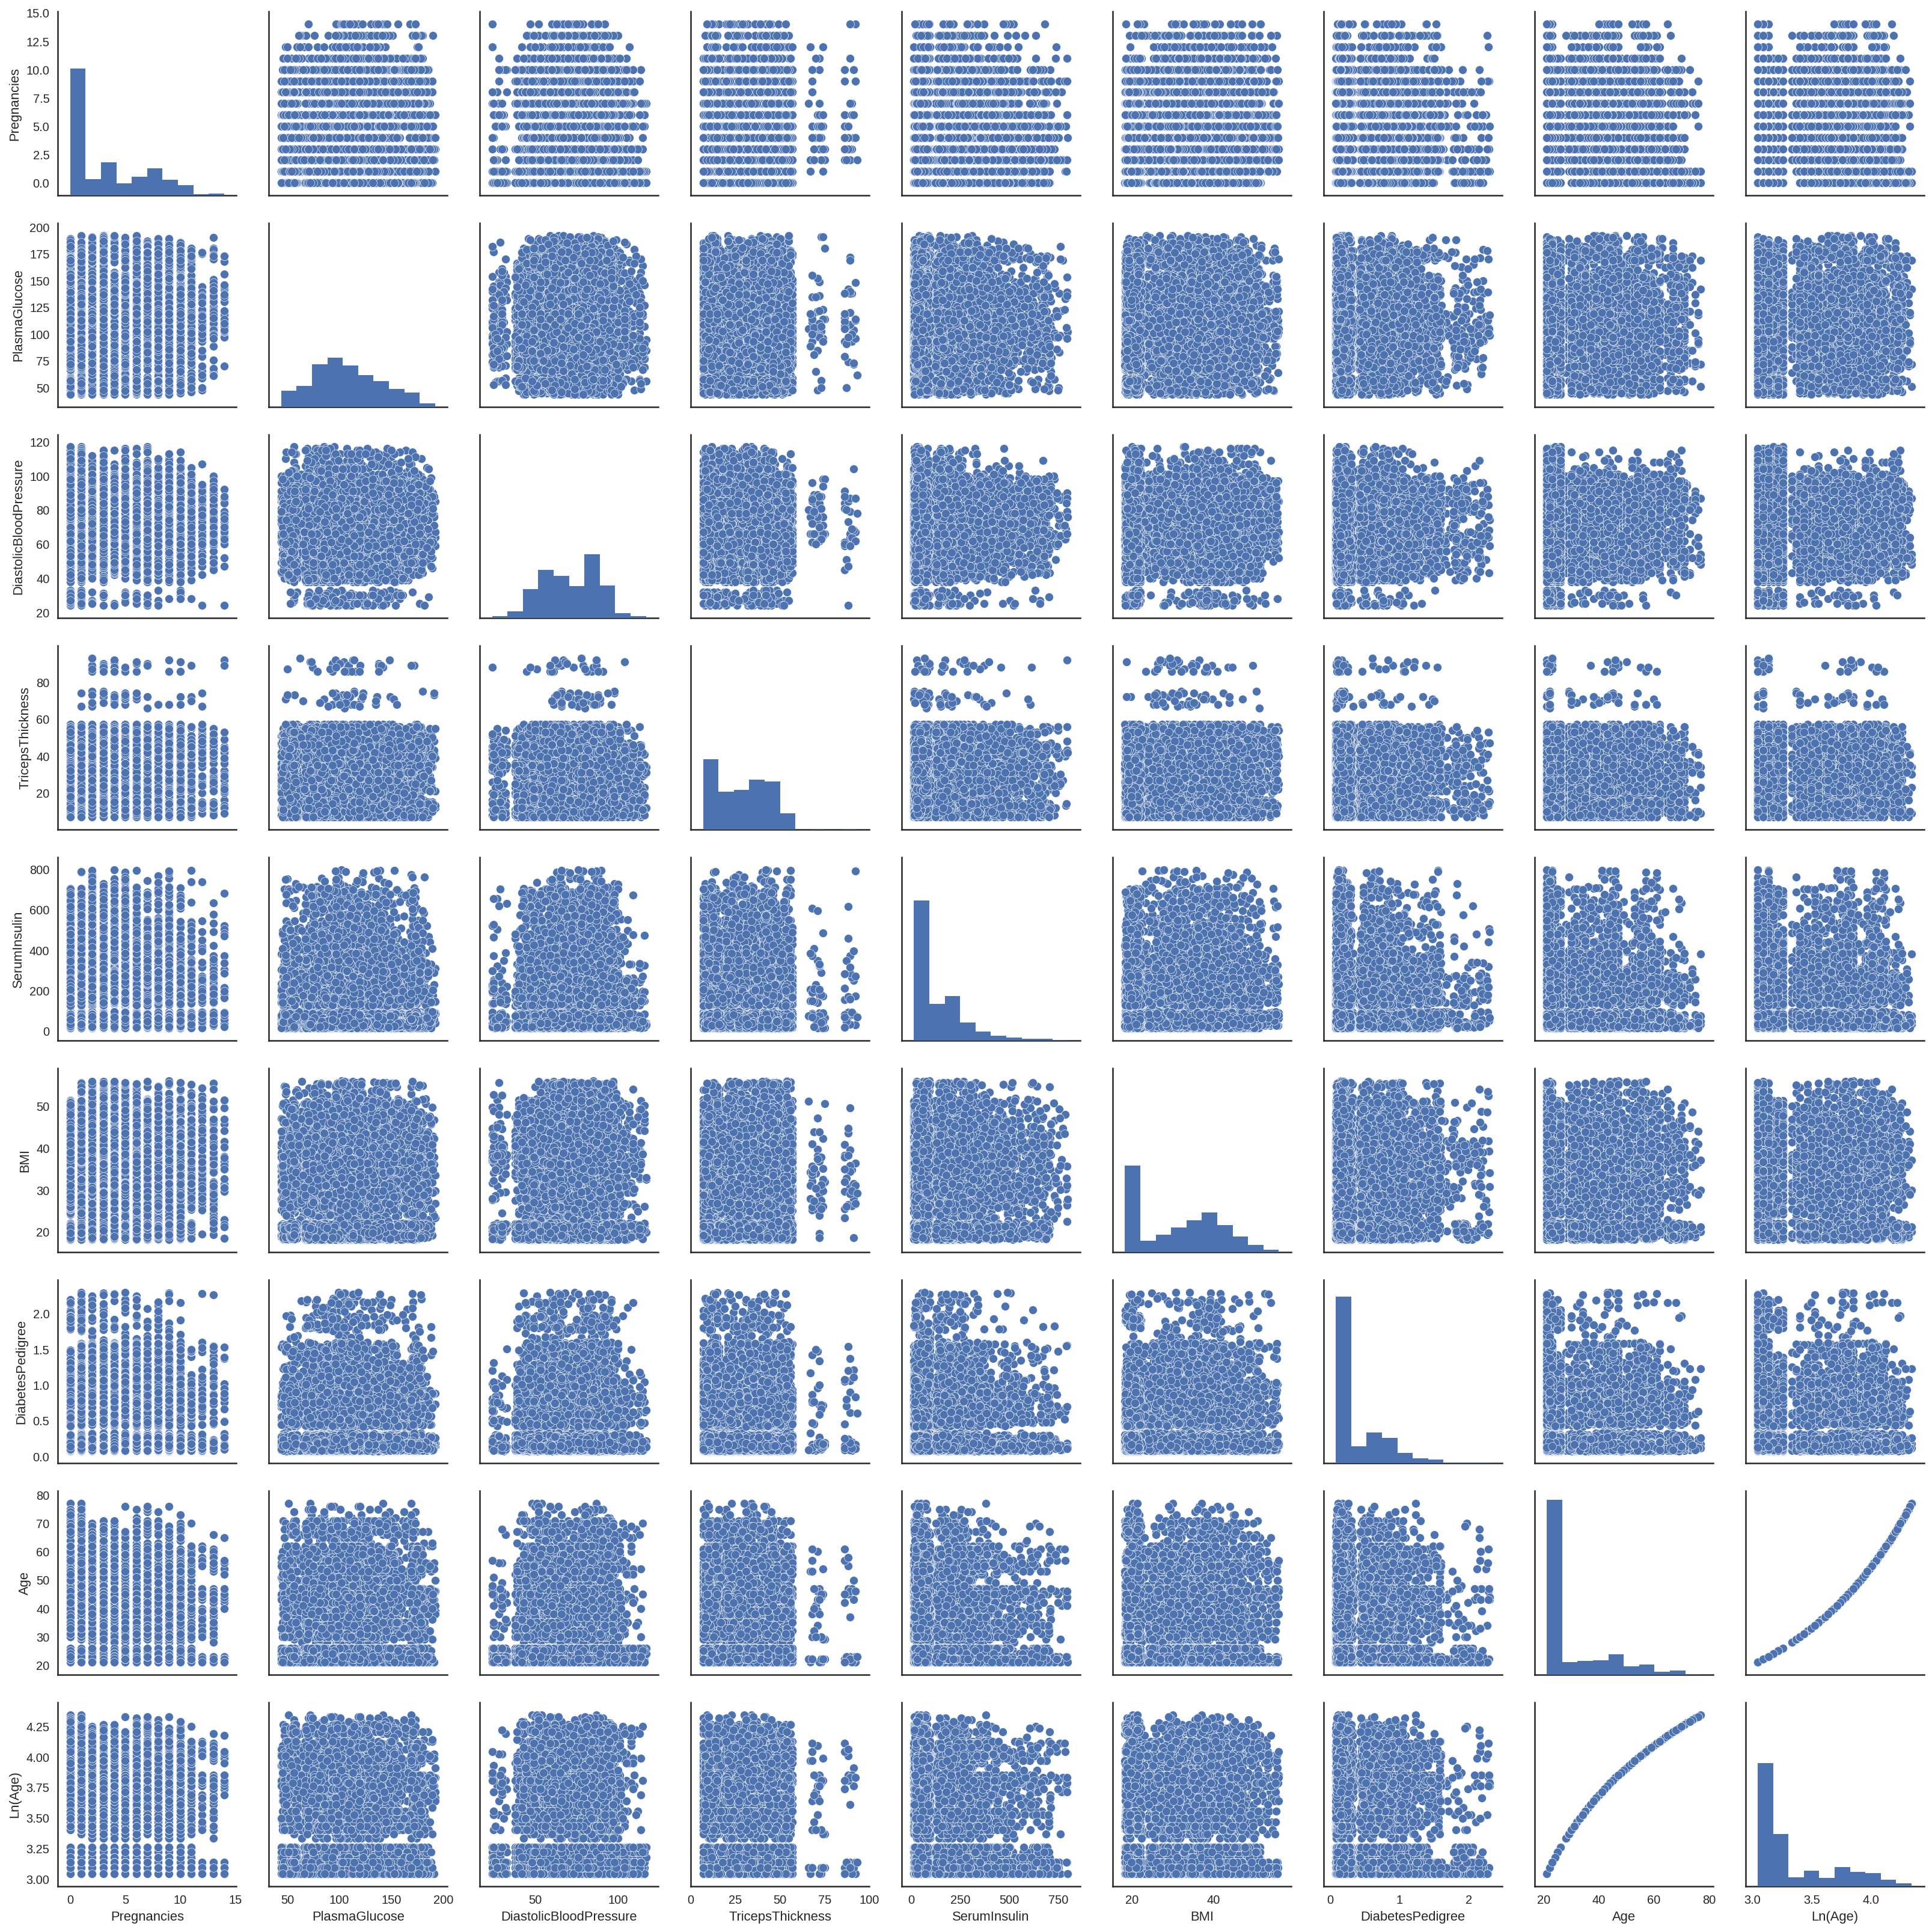

In [15]:
plt.style.use('seaborn-white')
cols = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age','Ln(Age)']
sns.pairplot(rawdf[cols])

In [0]:
df = rawdf.copy()

#feature scale
ss = StandardScaler()
scale_features = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']
                  
df[scale_features] = ss.fit_transform(df[scale_features])

In [0]:
minmax = MinMaxScaler()
minmax_features = ['Pregnancies','DiabetesPedigree','Age','Ln(Age)']
df[minmax_features] = minmax.fit_transform(df[minmax_features])

In [19]:
df.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778     0.000000       1.974401                0.523884   
1    1147438     0.571429      -0.495823                1.299626   
2    1640031     0.500000       0.223356               -1.445306   
3    1883350     0.642857      -0.151868                0.404539   
4    1424119     0.071429      -0.714703               -0.729237   

   TricepsThickness  SerumInsulin       BMI  DiabetesPedigree       Age  \
0          0.356298     -0.863136  1.229683          0.510511  0.000000   
1          1.249448     -0.765438 -1.052302          0.036123  0.035714   
2          1.592967     -0.772953  1.024922          0.000438  0.035714   
3         -0.262036      1.248633 -0.197512          0.541848  0.392857   
4         -0.124629     -0.772953  1.136926          0.212047  0.017857   

   Diabetic           Physician   Ln(Age)  
0         0         Dan Drayton  0.000000  
1         0    Anthony Frizzell  0.070017  
2         0  Gordon Fredrickson  0.070017  
3         1        Chad Corbitt  0.551595  
4         0     Zachary Fellows  0.035804

In [20]:
X = df.drop(['PatientID','Physician','Diabetic'],axis=1).values
y = (df['Diabetic'].values).reshape(-1,1)

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12000, 9) (12000, 1) (3000, 9) (3000, 1)


## 1 .Deep Neural Networks for Classification using different Activation Functions

In [0]:
batch_size = 256
epochs = 100

### 1.1 Using Sigmoid as Activation Function

In [35]:
model_1 = Sequential()
model_1.add(Dense(32, input_shape=(X.shape[1],),activation='sigmoid'))
model_1.add(Dense(8, activation='sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_1.history = model_1.fit(X_train,y_train,epochs=epochs,verbose=2,validation_data=(X_test,y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 3s - loss: 0.6278 - acc: 0.6315 - val_loss: 0.5641 - val_acc: 0.6923
Epoch 2/100
 - 2s - loss: 0.5253 - acc: 0.7468 - val_loss: 0.4888 - val_acc: 0.7757
Epoch 3/100
 - 2s - loss: 0.4735 - acc: 0.7806 - val_loss: 0.4537 - val_acc: 0.7957
Epoch 4/100
 - 2s - loss: 0.4501 - acc: 0.7904 - val_loss: 0.4421 - val_acc: 0.8007
Epoch 5/100
 - 2s - loss: 0.4418 - acc: 0.7888 - val_loss: 0.4349 - val_acc: 0.8000
Epoch 6/100
 - 2s - loss: 0.4388 - acc: 0.7917 - val_loss: 0.4328 - val_acc: 0.8003
Epoch 7/100
 - 2s - loss: 0.4368 - acc: 0.7935 - val_loss: 0.4319 - val_acc: 0.7993
Epoch 8/100
 - 2s - loss: 0.4354 - acc: 0.7915 - val_loss: 0.4301 - val_acc: 0.8003
Epoch 9/100
 - 2s - loss: 0.4341 - acc: 0.7936 - val_loss: 0.4291 - val_acc: 0.8003
Epoch 10/100
 - 2s - loss: 0.4327 - acc: 0.7937 - val_loss: 0.4274 - val_acc: 0.8020
Epoch 11/100
 - 2s - loss: 0.4307 - acc: 0.7962 - val_loss: 0.4304 - val_acc: 0.7913
Epoch 12/100
 - 2s - loss

 - 2s - loss: 0.3313 - acc: 0.8496 - val_loss: 0.3295 - val_acc: 0.8600
Epoch 35/100
 - 2s - loss: 0.3260 - acc: 0.8553 - val_loss: 0.3248 - val_acc: 0.8623
Epoch 36/100
 - 2s - loss: 0.3208 - acc: 0.8585 - val_loss: 0.3194 - val_acc: 0.8687
Epoch 37/100
 - 2s - loss: 0.3154 - acc: 0.8596 - val_loss: 0.3151 - val_acc: 0.8703
Epoch 38/100
 - 2s - loss: 0.3105 - acc: 0.8648 - val_loss: 0.3116 - val_acc: 0.8710
Epoch 39/100
 - 2s - loss: 0.3058 - acc: 0.8667 - val_loss: 0.3083 - val_acc: 0.8707
Epoch 40/100
 - 2s - loss: 0.3016 - acc: 0.8707 - val_loss: 0.3018 - val_acc: 0.8737
Epoch 41/100
 - 2s - loss: 0.2967 - acc: 0.8704 - val_loss: 0.2992 - val_acc: 0.8747
Epoch 42/100
 - 2s - loss: 0.2934 - acc: 0.8732 - val_loss: 0.2957 - val_acc: 0.8723
Epoch 43/100
 - 2s - loss: 0.2898 - acc: 0.8764 - val_loss: 0.2918 - val_acc: 0.8747
Epoch 44/100
 - 2s - loss: 0.2866 - acc: 0.8772 - val_loss: 0.2897 - val_acc: 0.8767
Epoch 45/100
 - 2s - loss: 0.2835 - acc: 0.8791 - val_loss: 0.2884 - val_acc: 

Epoch 68/100
 - 2s - loss: 0.2600 - acc: 0.8897 - val_loss: 0.2697 - val_acc: 0.8770
Epoch 69/100
 - 2s - loss: 0.2595 - acc: 0.8921 - val_loss: 0.2687 - val_acc: 0.8813
Epoch 70/100
 - 2s - loss: 0.2589 - acc: 0.8902 - val_loss: 0.2684 - val_acc: 0.8793
Epoch 71/100
 - 2s - loss: 0.2585 - acc: 0.8908 - val_loss: 0.2694 - val_acc: 0.8783
Epoch 72/100
 - 2s - loss: 0.2581 - acc: 0.8916 - val_loss: 0.2702 - val_acc: 0.8863
Epoch 73/100
 - 2s - loss: 0.2583 - acc: 0.8923 - val_loss: 0.2672 - val_acc: 0.8797
Epoch 74/100
 - 2s - loss: 0.2576 - acc: 0.8921 - val_loss: 0.2686 - val_acc: 0.8793
Epoch 75/100
 - 2s - loss: 0.2569 - acc: 0.8921 - val_loss: 0.2733 - val_acc: 0.8840
Epoch 76/100
 - 2s - loss: 0.2572 - acc: 0.8924 - val_loss: 0.2668 - val_acc: 0.8803
Epoch 77/100
 - 2s - loss: 0.2565 - acc: 0.8918 - val_loss: 0.2666 - val_acc: 0.8807
Epoch 78/100
 - 2s - loss: 0.2557 - acc: 0.8949 - val_loss: 0.2718 - val_acc: 0.8797
Epoch 79/100
 - 2s - loss: 0.2558 - acc: 0.8929 - val_loss: 0.266

#### For a binary classification, it is meaningful to use another metrics to evaluate model

In [78]:
y_pred_1 = model_1.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred_1,digits=4))

             precision    recall  f1-score   support

          0     0.9115    0.9206    0.9160      2002
          1     0.8374    0.8206    0.8289       998

avg / total     0.8868    0.8873    0.8870      3000



In [51]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 89.71 %     loss = 0.244572
Testing Accuracy = 88.73 %    loss = 0.259040


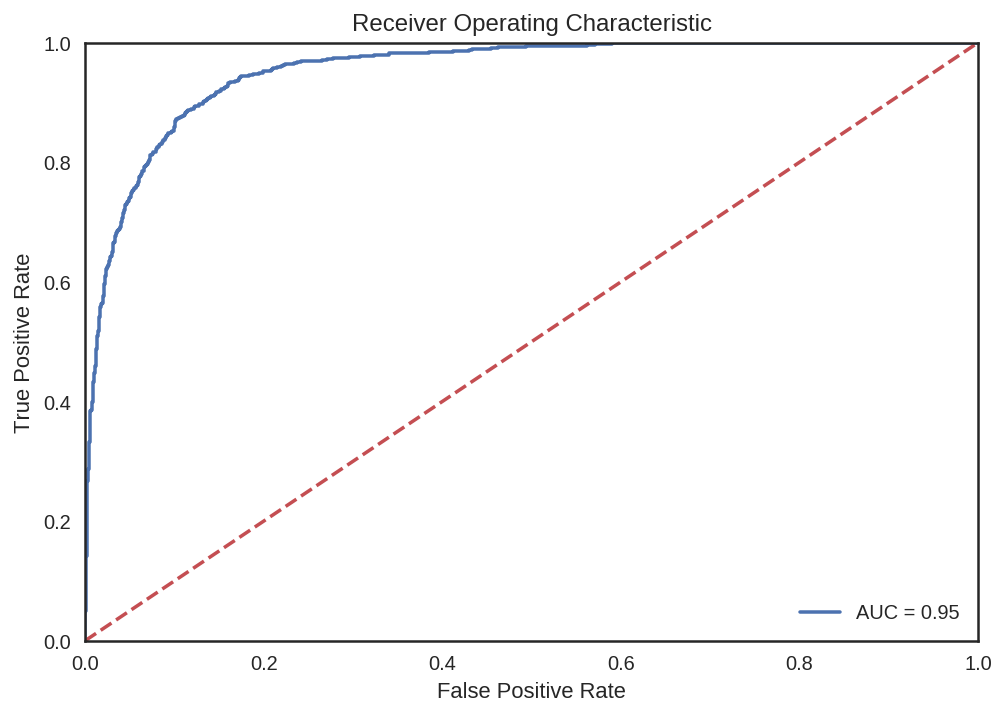

In [59]:
# calculate the fpr and tpr for all thresholds of the classification

preds_1 = model_1.predict_proba(X_test)
fpr_1, tpr_1, _= roc_curve(y_test,preds_1)
roc_auc_1 = auc(fpr_1, tpr_1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1, tpr_1, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.2 Using Tanh as Activation Function

In [54]:
model_2 = Sequential()
model_2.add(Dense(32, input_shape=(X.shape[1],),activation='tanh'))
model_2.add(Dense(8, activation='tanh'))
model_2.add(Dense(1,activation='sigmoid'))
model_2.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_2.history = model_2.fit(X_train,y_train,epochs=epochs,verbose=2,validation_data=(X_test,y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 3s - loss: 0.5237 - acc: 0.7442 - val_loss: 0.4481 - val_acc: 0.7957
Epoch 2/100
 - 2s - loss: 0.4443 - acc: 0.7891 - val_loss: 0.4326 - val_acc: 0.7973
Epoch 3/100
 - 2s - loss: 0.4366 - acc: 0.7938 - val_loss: 0.4284 - val_acc: 0.8033
Epoch 4/100
 - 2s - loss: 0.4276 - acc: 0.8007 - val_loss: 0.4180 - val_acc: 0.8107
Epoch 5/100
 - 2s - loss: 0.4128 - acc: 0.8057 - val_loss: 0.4016 - val_acc: 0.8137
Epoch 6/100
 - 2s - loss: 0.3956 - acc: 0.8196 - val_loss: 0.3866 - val_acc: 0.8223
Epoch 7/100
 - 2s - loss: 0.3774 - acc: 0.8307 - val_loss: 0.3720 - val_acc: 0.8380
Epoch 8/100
 - 2s - loss: 0.3633 - acc: 0.8385 - val_loss: 0.3635 - val_acc: 0.8417
Epoch 9/100
 - 2s - loss: 0.3528 - acc: 0.8435 - val_loss: 0.3528 - val_acc: 0.8443
Epoch 10/100
 - 2s - loss: 0.3407 - acc: 0.8483 - val_loss: 0.3400 - val_acc: 0.8547
Epoch 11/100
 - 2s - loss: 0.3272 - acc: 0.8559 - val_loss: 0.3271 - val_acc: 0.8600
Epoch 12/100
 - 2s - loss

 - 2s - loss: 0.2285 - acc: 0.9065 - val_loss: 0.2426 - val_acc: 0.8950
Epoch 35/100
 - 2s - loss: 0.2274 - acc: 0.9075 - val_loss: 0.2513 - val_acc: 0.8893
Epoch 36/100
 - 2s - loss: 0.2279 - acc: 0.9070 - val_loss: 0.2435 - val_acc: 0.8940
Epoch 37/100
 - 2s - loss: 0.2265 - acc: 0.9063 - val_loss: 0.2438 - val_acc: 0.8953
Epoch 38/100
 - 2s - loss: 0.2254 - acc: 0.9075 - val_loss: 0.2453 - val_acc: 0.8917
Epoch 39/100
 - 2s - loss: 0.2259 - acc: 0.9078 - val_loss: 0.2421 - val_acc: 0.8913
Epoch 40/100
 - 2s - loss: 0.2243 - acc: 0.9084 - val_loss: 0.2406 - val_acc: 0.8983
Epoch 41/100
 - 2s - loss: 0.2242 - acc: 0.9100 - val_loss: 0.2405 - val_acc: 0.8950
Epoch 42/100
 - 2s - loss: 0.2233 - acc: 0.9092 - val_loss: 0.2434 - val_acc: 0.8933
Epoch 43/100
 - 2s - loss: 0.2216 - acc: 0.9077 - val_loss: 0.2474 - val_acc: 0.8967
Epoch 44/100
 - 2s - loss: 0.2225 - acc: 0.9087 - val_loss: 0.2428 - val_acc: 0.8960
Epoch 45/100
 - 2s - loss: 0.2222 - acc: 0.9103 - val_loss: 0.2364 - val_acc: 

Epoch 68/100
 - 2s - loss: 0.2129 - acc: 0.9123 - val_loss: 0.2329 - val_acc: 0.8997
Epoch 69/100
 - 2s - loss: 0.2109 - acc: 0.9151 - val_loss: 0.2343 - val_acc: 0.9030
Epoch 70/100
 - 2s - loss: 0.2114 - acc: 0.9127 - val_loss: 0.2353 - val_acc: 0.9023
Epoch 71/100
 - 2s - loss: 0.2099 - acc: 0.9149 - val_loss: 0.2296 - val_acc: 0.9020
Epoch 72/100
 - 2s - loss: 0.2101 - acc: 0.9131 - val_loss: 0.2313 - val_acc: 0.9017
Epoch 73/100
 - 2s - loss: 0.2093 - acc: 0.9136 - val_loss: 0.2285 - val_acc: 0.8997
Epoch 74/100
 - 2s - loss: 0.2087 - acc: 0.9172 - val_loss: 0.2292 - val_acc: 0.9037
Epoch 75/100
 - 2s - loss: 0.2082 - acc: 0.9158 - val_loss: 0.2277 - val_acc: 0.9040
Epoch 76/100
 - 2s - loss: 0.2072 - acc: 0.9159 - val_loss: 0.2296 - val_acc: 0.9023
Epoch 77/100
 - 2s - loss: 0.2070 - acc: 0.9153 - val_loss: 0.2303 - val_acc: 0.9023
Epoch 78/100
 - 2s - loss: 0.2062 - acc: 0.9163 - val_loss: 0.2276 - val_acc: 0.9037
Epoch 79/100
 - 2s - loss: 0.2047 - acc: 0.9160 - val_loss: 0.226

In [77]:
y_pred_2 = model_2.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred_2,digits=4))

             precision    recall  f1-score   support

          0     0.9356    0.9286    0.9321      2002
          1     0.8588    0.8717    0.8652       998

avg / total     0.9101    0.9097    0.9098      3000



In [57]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 92.72 %     loss = 0.180850
Testing Accuracy = 90.97 %    loss = 0.213854


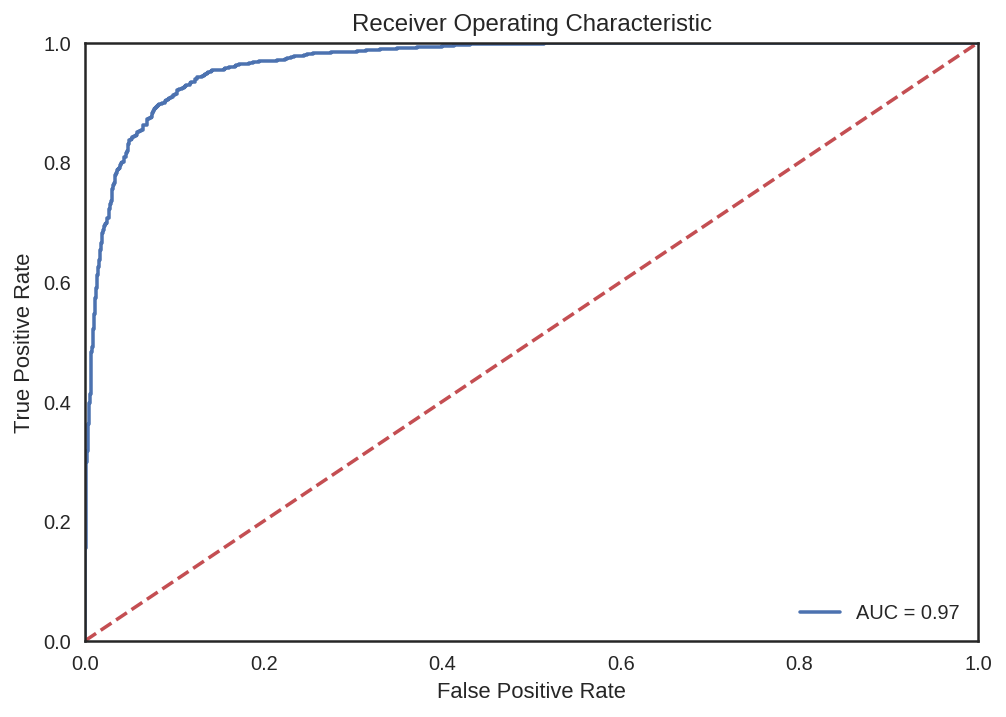

In [103]:
preds_2 = model_2.predict_proba(X_test)
fpr_2, tpr_2, _= roc_curve(y_test,preds_2)
roc_auc_2 = auc(fpr_2, tpr_2)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_2, tpr_2, 'b', label = 'AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.3 Using ReLU as Activation Function

In [61]:
model_3 = Sequential()
model_3.add(Dense(32, input_shape=(X.shape[1],),activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))
model_3.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_3.history = model_3.fit(X_train,y_train,epochs=epochs,verbose=2,validation_data=(X_test,y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 3s - loss: 0.5158 - acc: 0.7405 - val_loss: 0.4138 - val_acc: 0.8133
Epoch 2/100
 - 2s - loss: 0.4034 - acc: 0.8134 - val_loss: 0.3879 - val_acc: 0.8243
Epoch 3/100
 - 2s - loss: 0.3867 - acc: 0.8219 - val_loss: 0.3768 - val_acc: 0.8293
Epoch 4/100
 - 2s - loss: 0.3742 - acc: 0.8291 - val_loss: 0.3652 - val_acc: 0.8380
Epoch 5/100
 - 2s - loss: 0.3603 - acc: 0.8356 - val_loss: 0.3491 - val_acc: 0.8470
Epoch 6/100
 - 2s - loss: 0.3414 - acc: 0.8469 - val_loss: 0.3316 - val_acc: 0.8533
Epoch 7/100
 - 2s - loss: 0.3249 - acc: 0.8555 - val_loss: 0.3159 - val_acc: 0.8657
Epoch 8/100
 - 2s - loss: 0.3082 - acc: 0.8639 - val_loss: 0.3009 - val_acc: 0.8713
Epoch 9/100
 - 2s - loss: 0.2934 - acc: 0.8735 - val_loss: 0.2927 - val_acc: 0.8753
Epoch 10/100
 - 2s - loss: 0.2811 - acc: 0.8795 - val_loss: 0.2832 - val_acc: 0.8793
Epoch 11/100
 - 2s - loss: 0.2704 - acc: 0.8869 - val_loss: 0.2711 - val_acc: 0.8840
Epoch 12/100
 - 2s - loss

 - 2s - loss: 0.2116 - acc: 0.9137 - val_loss: 0.2308 - val_acc: 0.9033
Epoch 35/100
 - 2s - loss: 0.2101 - acc: 0.9148 - val_loss: 0.2352 - val_acc: 0.9037
Epoch 36/100
 - 2s - loss: 0.2072 - acc: 0.9148 - val_loss: 0.2345 - val_acc: 0.9000
Epoch 37/100
 - 2s - loss: 0.2053 - acc: 0.9163 - val_loss: 0.2477 - val_acc: 0.8963
Epoch 38/100
 - 2s - loss: 0.2043 - acc: 0.9162 - val_loss: 0.2261 - val_acc: 0.9070
Epoch 39/100
 - 2s - loss: 0.2037 - acc: 0.9173 - val_loss: 0.2282 - val_acc: 0.9017
Epoch 40/100
 - 2s - loss: 0.2022 - acc: 0.9156 - val_loss: 0.2265 - val_acc: 0.9050
Epoch 41/100
 - 2s - loss: 0.2006 - acc: 0.9173 - val_loss: 0.2410 - val_acc: 0.8973
Epoch 42/100
 - 2s - loss: 0.1991 - acc: 0.9180 - val_loss: 0.2224 - val_acc: 0.9060
Epoch 43/100
 - 2s - loss: 0.1978 - acc: 0.9191 - val_loss: 0.2243 - val_acc: 0.9063
Epoch 44/100
 - 2s - loss: 0.1978 - acc: 0.9192 - val_loss: 0.2249 - val_acc: 0.9040
Epoch 45/100
 - 2s - loss: 0.1964 - acc: 0.9198 - val_loss: 0.2251 - val_acc: 

Epoch 68/100
 - 2s - loss: 0.1788 - acc: 0.9267 - val_loss: 0.2187 - val_acc: 0.9073
Epoch 69/100
 - 2s - loss: 0.1780 - acc: 0.9274 - val_loss: 0.2230 - val_acc: 0.9073
Epoch 70/100
 - 2s - loss: 0.1785 - acc: 0.9270 - val_loss: 0.2158 - val_acc: 0.9107
Epoch 71/100
 - 2s - loss: 0.1765 - acc: 0.9272 - val_loss: 0.2125 - val_acc: 0.9157
Epoch 72/100
 - 2s - loss: 0.1770 - acc: 0.9275 - val_loss: 0.2095 - val_acc: 0.9143
Epoch 73/100
 - 2s - loss: 0.1761 - acc: 0.9290 - val_loss: 0.2073 - val_acc: 0.9143
Epoch 74/100
 - 2s - loss: 0.1763 - acc: 0.9282 - val_loss: 0.2080 - val_acc: 0.9113
Epoch 75/100
 - 2s - loss: 0.1754 - acc: 0.9282 - val_loss: 0.2100 - val_acc: 0.9120
Epoch 76/100
 - 2s - loss: 0.1752 - acc: 0.9283 - val_loss: 0.2129 - val_acc: 0.9103
Epoch 77/100
 - 2s - loss: 0.1739 - acc: 0.9296 - val_loss: 0.2088 - val_acc: 0.9120
Epoch 78/100
 - 2s - loss: 0.1741 - acc: 0.9295 - val_loss: 0.2059 - val_acc: 0.9140
Epoch 79/100
 - 2s - loss: 0.1727 - acc: 0.9304 - val_loss: 0.210

In [76]:
y_pred_3 = model_3.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred_3,digits=4))

             precision    recall  f1-score   support

          0     0.9267    0.9411    0.9338      2002
          1     0.8780    0.8507    0.8641       998

avg / total     0.9105    0.9110    0.9106      3000



In [63]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 93.47 %     loss = 0.164044
Testing Accuracy = 91.10 %    loss = 0.207830


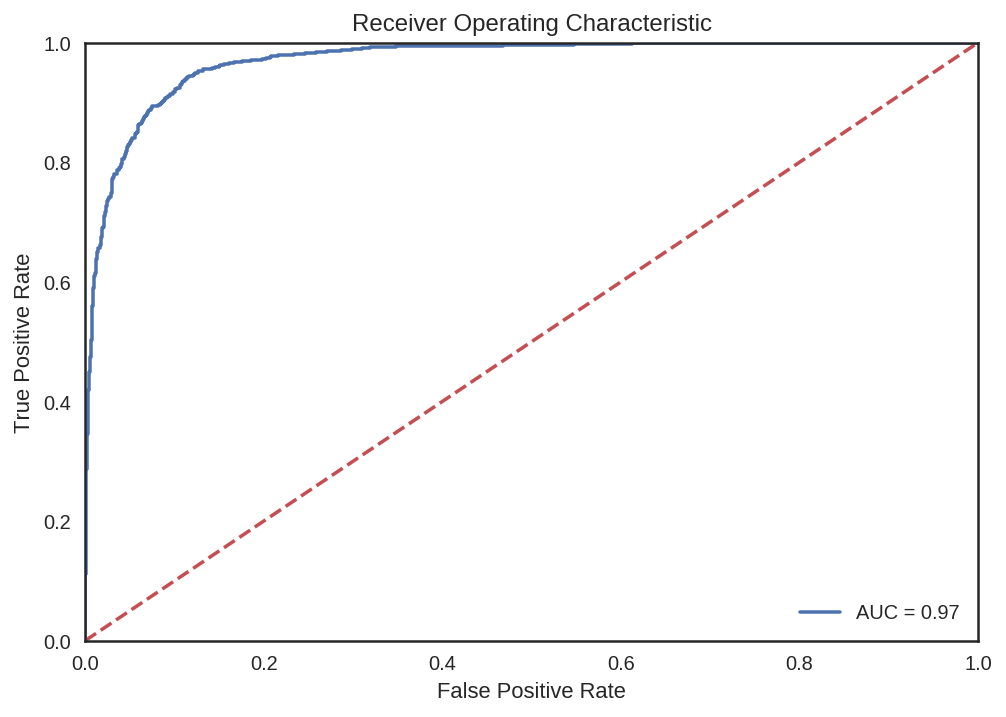

In [102]:
preds_3 = model_3.predict_proba(X_test)
fpr_3, tpr_3, _= roc_curve(y_test,preds_3)
roc_auc_3 = auc(fpr_3, tpr_3)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_3, tpr_3, 'b', label = 'AUC = %0.2f' % roc_auc_3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.4 Using LeakyReLU as Activation Function $\alpha=0.01$


In [66]:
model_4 = Sequential()
model_4.add(Dense(32, input_shape=(X.shape[1],)))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(8))
model_4.add(LeakyReLU(0.01))
model_4.add(Dense(1,activation='sigmoid'))
model_4.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_4.history = model_4.fit(X_train,y_train,epochs=epochs,verbose=2,validation_data=(X_test,y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 3s - loss: 0.5177 - acc: 0.7529 - val_loss: 0.4210 - val_acc: 0.8103
Epoch 2/100
 - 3s - loss: 0.4037 - acc: 0.8186 - val_loss: 0.3801 - val_acc: 0.8323
Epoch 3/100
 - 3s - loss: 0.3794 - acc: 0.8264 - val_loss: 0.3683 - val_acc: 0.8373
Epoch 4/100
 - 2s - loss: 0.3675 - acc: 0.8343 - val_loss: 0.3637 - val_acc: 0.8403
Epoch 5/100
 - 3s - loss: 0.3591 - acc: 0.8374 - val_loss: 0.3559 - val_acc: 0.8453
Epoch 6/100
 - 2s - loss: 0.3512 - acc: 0.8452 - val_loss: 0.3514 - val_acc: 0.8460
Epoch 7/100
 - 3s - loss: 0.3454 - acc: 0.8463 - val_loss: 0.3456 - val_acc: 0.8547
Epoch 8/100
 - 3s - loss: 0.3389 - acc: 0.8500 - val_loss: 0.3408 - val_acc: 0.8583
Epoch 9/100
 - 3s - loss: 0.3337 - acc: 0.8534 - val_loss: 0.3410 - val_acc: 0.8540
Epoch 10/100
 - 3s - loss: 0.3283 - acc: 0.8566 - val_loss: 0.3326 - val_acc: 0.8587
Epoch 11/100
 - 3s - loss: 0.3201 - acc: 0.8609 - val_loss: 0.3244 - val_acc: 0.8620
Epoch 12/100
 - 3s - loss

 - 2s - loss: 0.2163 - acc: 0.9115 - val_loss: 0.2388 - val_acc: 0.8953
Epoch 35/100
 - 2s - loss: 0.2155 - acc: 0.9122 - val_loss: 0.2349 - val_acc: 0.8987
Epoch 36/100
 - 3s - loss: 0.2135 - acc: 0.9122 - val_loss: 0.2352 - val_acc: 0.9023
Epoch 37/100
 - 3s - loss: 0.2134 - acc: 0.9129 - val_loss: 0.2330 - val_acc: 0.9017
Epoch 38/100
 - 2s - loss: 0.2115 - acc: 0.9142 - val_loss: 0.2362 - val_acc: 0.9043
Epoch 39/100
 - 3s - loss: 0.2101 - acc: 0.9133 - val_loss: 0.2353 - val_acc: 0.9040
Epoch 40/100
 - 2s - loss: 0.2109 - acc: 0.9101 - val_loss: 0.2311 - val_acc: 0.9043
Epoch 41/100
 - 3s - loss: 0.2086 - acc: 0.9118 - val_loss: 0.2311 - val_acc: 0.9010
Epoch 42/100
 - 2s - loss: 0.2084 - acc: 0.9138 - val_loss: 0.2298 - val_acc: 0.9063
Epoch 43/100
 - 3s - loss: 0.2062 - acc: 0.9153 - val_loss: 0.2309 - val_acc: 0.9050
Epoch 44/100
 - 2s - loss: 0.2052 - acc: 0.9157 - val_loss: 0.2297 - val_acc: 0.9057
Epoch 45/100
 - 3s - loss: 0.2054 - acc: 0.9169 - val_loss: 0.2335 - val_acc: 

Epoch 68/100
 - 3s - loss: 0.1839 - acc: 0.9234 - val_loss: 0.2115 - val_acc: 0.9113
Epoch 69/100
 - 3s - loss: 0.1841 - acc: 0.9268 - val_loss: 0.2130 - val_acc: 0.9110
Epoch 70/100
 - 2s - loss: 0.1833 - acc: 0.9254 - val_loss: 0.2161 - val_acc: 0.9107
Epoch 71/100
 - 3s - loss: 0.1828 - acc: 0.9233 - val_loss: 0.2125 - val_acc: 0.9127
Epoch 72/100
 - 3s - loss: 0.1807 - acc: 0.9257 - val_loss: 0.2159 - val_acc: 0.9067
Epoch 73/100
 - 2s - loss: 0.1805 - acc: 0.9275 - val_loss: 0.2127 - val_acc: 0.9140
Epoch 74/100
 - 2s - loss: 0.1798 - acc: 0.9264 - val_loss: 0.2125 - val_acc: 0.9133
Epoch 75/100
 - 3s - loss: 0.1797 - acc: 0.9283 - val_loss: 0.2148 - val_acc: 0.9127
Epoch 76/100
 - 3s - loss: 0.1799 - acc: 0.9283 - val_loss: 0.2104 - val_acc: 0.9160
Epoch 77/100
 - 3s - loss: 0.1786 - acc: 0.9269 - val_loss: 0.2142 - val_acc: 0.9090
Epoch 78/100
 - 2s - loss: 0.1779 - acc: 0.9262 - val_loss: 0.2202 - val_acc: 0.9077
Epoch 79/100
 - 3s - loss: 0.1780 - acc: 0.9288 - val_loss: 0.210

In [75]:
y_pred_4 = model_4.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred_4,digits=4))

             precision    recall  f1-score   support

          0     0.9349    0.9466    0.9407      2002
          1     0.8900    0.8677    0.8787       998

avg / total     0.9200    0.9203    0.9201      3000



In [68]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 93.50 %     loss = 0.159865
Testing Accuracy = 92.03 %    loss = 0.201456


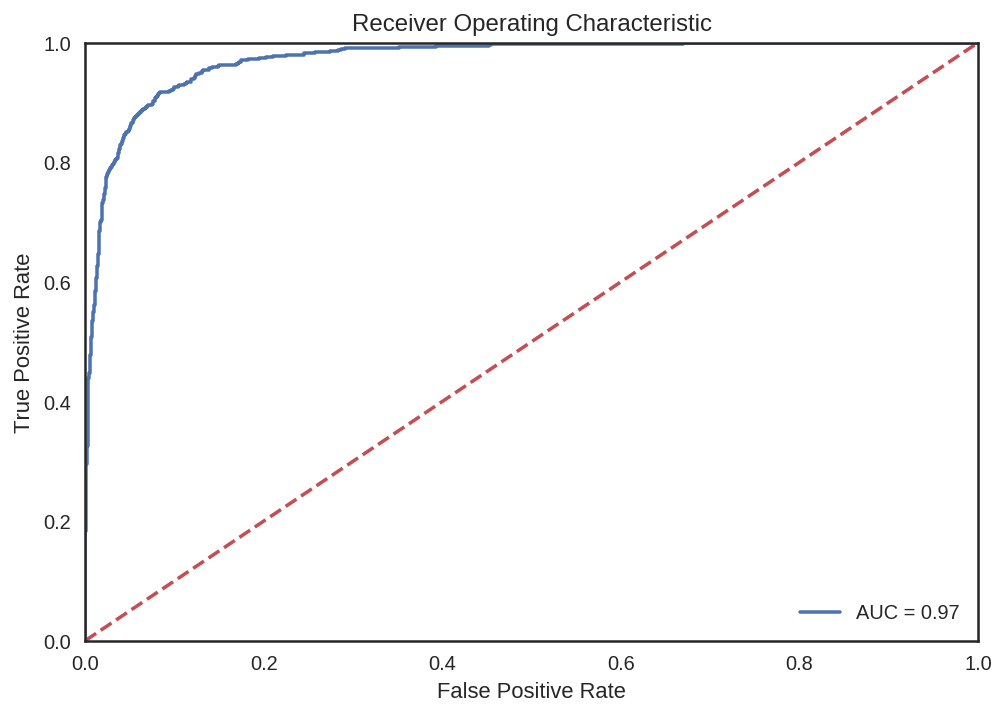

In [101]:
preds_4 = model_4.predict_proba(X_test)
fpr_4, tpr_4, _= roc_curve(y_test,preds_4)
roc_auc_4 = auc(fpr_4, tpr_4)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_4, tpr_4, 'b', label = 'AUC = %0.2f' % roc_auc_4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.5 Using PReLU as Activation Function 

In [73]:
model_5 = Sequential()
model_5.add(Dense(32, input_shape=(X.shape[1],)))
model_5.add(PReLU())
model_5.add(Dense(8))
model_5.add(PReLU())
model_5.add(Dense(1,activation='sigmoid'))
model_5.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_5.history = model_5.fit(X_train,y_train,epochs=epochs,verbose=2,validation_data=(X_test,y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 3s - loss: 0.4969 - acc: 0.7592 - val_loss: 0.4198 - val_acc: 0.8153
Epoch 2/100
 - 3s - loss: 0.4088 - acc: 0.8103 - val_loss: 0.3929 - val_acc: 0.8243
Epoch 3/100
 - 3s - loss: 0.3935 - acc: 0.8172 - val_loss: 0.3852 - val_acc: 0.8257
Epoch 4/100
 - 3s - loss: 0.3829 - acc: 0.8245 - val_loss: 0.3750 - val_acc: 0.8317
Epoch 5/100
 - 3s - loss: 0.3737 - acc: 0.8303 - val_loss: 0.3672 - val_acc: 0.8363
Epoch 6/100
 - 3s - loss: 0.3634 - acc: 0.8357 - val_loss: 0.3561 - val_acc: 0.8443
Epoch 7/100
 - 3s - loss: 0.3528 - acc: 0.8436 - val_loss: 0.3489 - val_acc: 0.8473
Epoch 8/100
 - 3s - loss: 0.3420 - acc: 0.8502 - val_loss: 0.3466 - val_acc: 0.8557
Epoch 9/100
 - 3s - loss: 0.3308 - acc: 0.8543 - val_loss: 0.3282 - val_acc: 0.8607
Epoch 10/100
 - 3s - loss: 0.3194 - acc: 0.8631 - val_loss: 0.3184 - val_acc: 0.8697
Epoch 11/100
 - 3s - loss: 0.3064 - acc: 0.8702 - val_loss: 0.3049 - val_acc: 0.8757
Epoch 12/100
 - 3s - loss

 - 3s - loss: 0.2013 - acc: 0.9172 - val_loss: 0.2312 - val_acc: 0.9047
Epoch 35/100
 - 3s - loss: 0.1989 - acc: 0.9185 - val_loss: 0.2256 - val_acc: 0.9063
Epoch 36/100
 - 3s - loss: 0.1977 - acc: 0.9198 - val_loss: 0.2249 - val_acc: 0.9077
Epoch 37/100
 - 3s - loss: 0.1973 - acc: 0.9202 - val_loss: 0.2189 - val_acc: 0.9063
Epoch 38/100
 - 3s - loss: 0.1966 - acc: 0.9183 - val_loss: 0.2205 - val_acc: 0.9110
Epoch 39/100
 - 3s - loss: 0.1968 - acc: 0.9212 - val_loss: 0.2186 - val_acc: 0.9103
Epoch 40/100
 - 3s - loss: 0.1944 - acc: 0.9210 - val_loss: 0.2159 - val_acc: 0.9093
Epoch 41/100
 - 3s - loss: 0.1938 - acc: 0.9196 - val_loss: 0.2192 - val_acc: 0.9117
Epoch 42/100
 - 3s - loss: 0.1935 - acc: 0.9204 - val_loss: 0.2160 - val_acc: 0.9103
Epoch 43/100
 - 3s - loss: 0.1919 - acc: 0.9209 - val_loss: 0.2228 - val_acc: 0.9067
Epoch 44/100
 - 3s - loss: 0.1923 - acc: 0.9217 - val_loss: 0.2154 - val_acc: 0.9080
Epoch 45/100
 - 3s - loss: 0.1904 - acc: 0.9216 - val_loss: 0.2172 - val_acc: 

Epoch 68/100
 - 3s - loss: 0.1682 - acc: 0.9319 - val_loss: 0.2001 - val_acc: 0.9193
Epoch 69/100
 - 3s - loss: 0.1662 - acc: 0.9316 - val_loss: 0.2078 - val_acc: 0.9137
Epoch 70/100
 - 3s - loss: 0.1664 - acc: 0.9323 - val_loss: 0.1896 - val_acc: 0.9253
Epoch 71/100
 - 3s - loss: 0.1658 - acc: 0.9328 - val_loss: 0.1916 - val_acc: 0.9250
Epoch 72/100
 - 3s - loss: 0.1645 - acc: 0.9329 - val_loss: 0.1912 - val_acc: 0.9270
Epoch 73/100
 - 3s - loss: 0.1642 - acc: 0.9329 - val_loss: 0.1895 - val_acc: 0.9300
Epoch 74/100
 - 3s - loss: 0.1627 - acc: 0.9343 - val_loss: 0.2009 - val_acc: 0.9210
Epoch 75/100
 - 3s - loss: 0.1620 - acc: 0.9344 - val_loss: 0.1929 - val_acc: 0.9223
Epoch 76/100
 - 3s - loss: 0.1628 - acc: 0.9332 - val_loss: 0.1922 - val_acc: 0.9243
Epoch 77/100
 - 3s - loss: 0.1614 - acc: 0.9321 - val_loss: 0.1964 - val_acc: 0.9207
Epoch 78/100
 - 3s - loss: 0.1612 - acc: 0.9344 - val_loss: 0.1952 - val_acc: 0.9253
Epoch 79/100
 - 3s - loss: 0.1603 - acc: 0.9339 - val_loss: 0.191

In [74]:
y_pred_5 = model_5.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred_5,digits=4))

             precision    recall  f1-score   support

          0     0.9289    0.9525    0.9406      2002
          1     0.8997    0.8537    0.8761       998

avg / total     0.9192    0.9197    0.9191      3000



In [79]:
train_loss_5, train_accuracy_5 = model_5.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 93.62 %     loss = 0.151082
Testing Accuracy = 91.97 %    loss = 0.191436


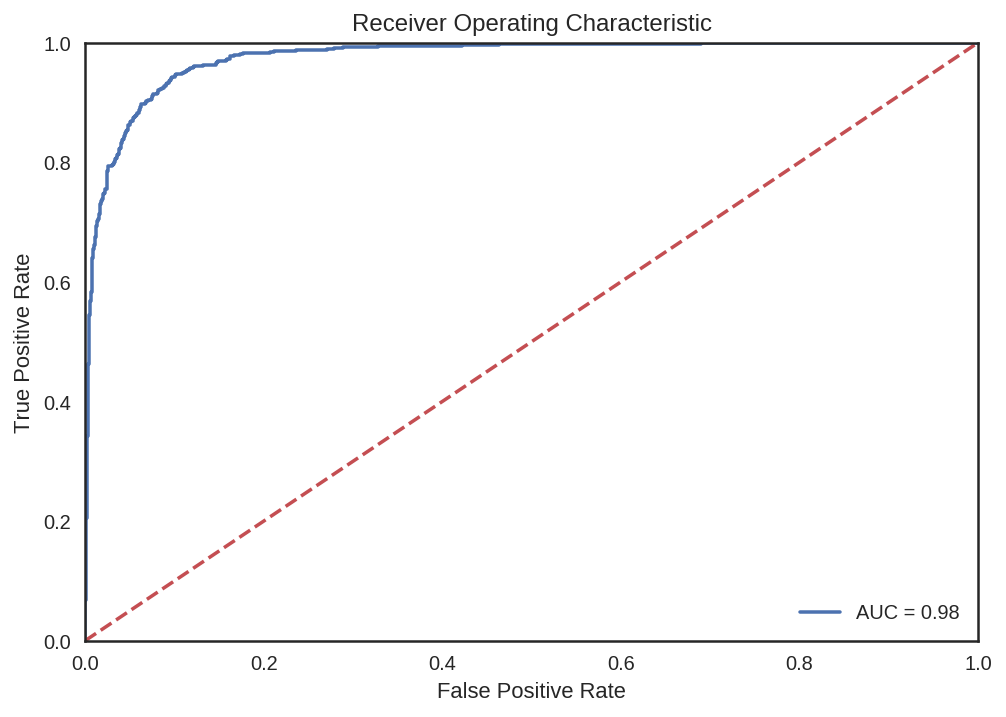

In [100]:
preds_5 = model_5.predict_proba(X_test)
fpr_5, tpr_5, _= roc_curve(y_test,preds_5)
roc_auc_5 = auc(fpr_5, tpr_5)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_5, tpr_5, 'b', label = 'AUC = %0.2f' % roc_auc_5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.6 Using Linear as Activation Function 

In [81]:
model_6 = Sequential()
model_6.add(Dense(32, input_shape=(X.shape[1],),activation='linear'))
model_6.add(Dense(8, activation='linear'))
model_6.add(Dense(1,activation='sigmoid'))
model_6.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_6.history = model_6.fit(X_train,y_train,epochs=epochs,verbose=2,validation_data=(X_test,y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 3s - loss: 0.5082 - acc: 0.7493 - val_loss: 0.4426 - val_acc: 0.7947
Epoch 2/100
 - 2s - loss: 0.4443 - acc: 0.7843 - val_loss: 0.4392 - val_acc: 0.7907
Epoch 3/100
 - 2s - loss: 0.4424 - acc: 0.7849 - val_loss: 0.4362 - val_acc: 0.7933
Epoch 4/100
 - 2s - loss: 0.4426 - acc: 0.7853 - val_loss: 0.4365 - val_acc: 0.7947
Epoch 5/100
 - 2s - loss: 0.4423 - acc: 0.7867 - val_loss: 0.4360 - val_acc: 0.7913
Epoch 6/100
 - 2s - loss: 0.4427 - acc: 0.7846 - val_loss: 0.4378 - val_acc: 0.7923
Epoch 7/100
 - 2s - loss: 0.4419 - acc: 0.7867 - val_loss: 0.4405 - val_acc: 0.7933
Epoch 8/100
 - 2s - loss: 0.4414 - acc: 0.7863 - val_loss: 0.4394 - val_acc: 0.7920
Epoch 9/100
 - 2s - loss: 0.4422 - acc: 0.7813 - val_loss: 0.4363 - val_acc: 0.7937
Epoch 10/100
 - 2s - loss: 0.4421 - acc: 0.7859 - val_loss: 0.4396 - val_acc: 0.7943
Epoch 11/100
 - 2s - loss: 0.4419 - acc: 0.7884 - val_loss: 0.4375 - val_acc: 0.7937
Epoch 12/100
 - 2s - loss

 - 2s - loss: 0.4411 - acc: 0.7873 - val_loss: 0.4384 - val_acc: 0.7943
Epoch 35/100
 - 2s - loss: 0.4409 - acc: 0.7866 - val_loss: 0.4356 - val_acc: 0.7943
Epoch 36/100
 - 2s - loss: 0.4410 - acc: 0.7863 - val_loss: 0.4360 - val_acc: 0.7953
Epoch 37/100
 - 2s - loss: 0.4408 - acc: 0.7866 - val_loss: 0.4380 - val_acc: 0.7937
Epoch 38/100
 - 2s - loss: 0.4403 - acc: 0.7855 - val_loss: 0.4374 - val_acc: 0.7910
Epoch 39/100
 - 2s - loss: 0.4409 - acc: 0.7863 - val_loss: 0.4356 - val_acc: 0.7933
Epoch 40/100
 - 2s - loss: 0.4409 - acc: 0.7879 - val_loss: 0.4358 - val_acc: 0.7980
Epoch 41/100
 - 2s - loss: 0.4407 - acc: 0.7872 - val_loss: 0.4354 - val_acc: 0.7943
Epoch 42/100
 - 2s - loss: 0.4406 - acc: 0.7854 - val_loss: 0.4376 - val_acc: 0.7937
Epoch 43/100
 - 2s - loss: 0.4410 - acc: 0.7861 - val_loss: 0.4365 - val_acc: 0.7957
Epoch 44/100
 - 2s - loss: 0.4409 - acc: 0.7874 - val_loss: 0.4377 - val_acc: 0.7937
Epoch 45/100
 - 2s - loss: 0.4408 - acc: 0.7855 - val_loss: 0.4380 - val_acc: 

Epoch 68/100
 - 2s - loss: 0.4406 - acc: 0.7861 - val_loss: 0.4377 - val_acc: 0.7927
Epoch 69/100
 - 2s - loss: 0.4404 - acc: 0.7867 - val_loss: 0.4362 - val_acc: 0.7923
Epoch 70/100
 - 2s - loss: 0.4404 - acc: 0.7859 - val_loss: 0.4357 - val_acc: 0.7977
Epoch 71/100
 - 2s - loss: 0.4400 - acc: 0.7858 - val_loss: 0.4367 - val_acc: 0.7973
Epoch 72/100
 - 2s - loss: 0.4401 - acc: 0.7862 - val_loss: 0.4353 - val_acc: 0.7923
Epoch 73/100
 - 2s - loss: 0.4406 - acc: 0.7866 - val_loss: 0.4366 - val_acc: 0.7953
Epoch 74/100
 - 2s - loss: 0.4403 - acc: 0.7844 - val_loss: 0.4391 - val_acc: 0.7957
Epoch 75/100
 - 2s - loss: 0.4404 - acc: 0.7867 - val_loss: 0.4382 - val_acc: 0.7937
Epoch 76/100
 - 2s - loss: 0.4404 - acc: 0.7864 - val_loss: 0.4365 - val_acc: 0.7953
Epoch 77/100
 - 2s - loss: 0.4404 - acc: 0.7867 - val_loss: 0.4362 - val_acc: 0.7957
Epoch 78/100
 - 2s - loss: 0.4405 - acc: 0.7854 - val_loss: 0.4355 - val_acc: 0.7930
Epoch 79/100
 - 2s - loss: 0.4406 - acc: 0.7837 - val_loss: 0.436

In [82]:
y_pred_6 = model_6.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred_6,digits=4))

             precision    recall  f1-score   support

          0     0.8280    0.8731    0.8500      2002
          1     0.7143    0.6363    0.6730       998

avg / total     0.7902    0.7943    0.7911      3000



In [84]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 78.65 %     loss = 0.439293
Testing Accuracy = 79.43 %    loss = 0.436459


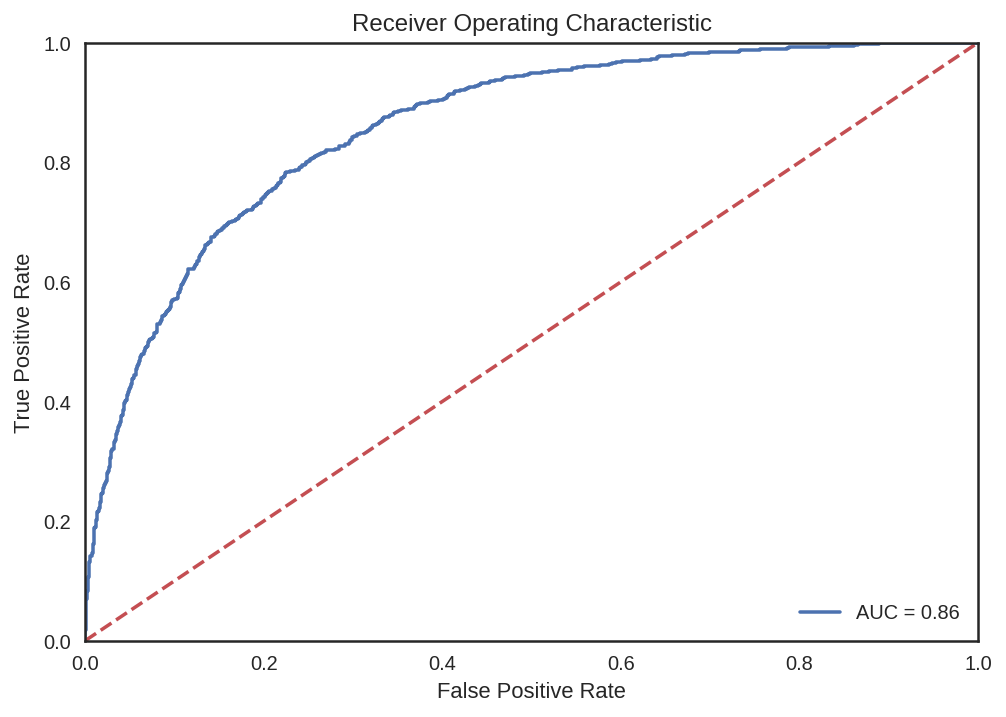

In [99]:
preds_6 = model_6.predict_proba(X_test)
fpr_6, tpr_6, _= roc_curve(y_test,preds_6)
roc_auc_6 = auc(fpr_6, tpr_6)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_6, tpr_6, 'b', label = 'AUC = %0.2f' % roc_auc_6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 1.7 Using ELU as Activation Function 

In [86]:
model_7 = Sequential()
model_7.add(Dense(32, input_shape=(X.shape[1],),activation='elu'))
model_7.add(Dense(8, activation='elu'))
model_7.add(Dense(1,activation='sigmoid'))
model_7.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_7.history = model_7.fit(X_train,y_train,epochs=epochs,verbose=2,validation_data=(X_test,y_test))

Train on 12000 samples, validate on 3000 samples
Epoch 1/100
 - 3s - loss: 0.5247 - acc: 0.7338 - val_loss: 0.4451 - val_acc: 0.7937
Epoch 2/100
 - 2s - loss: 0.4352 - acc: 0.7955 - val_loss: 0.4258 - val_acc: 0.8033
Epoch 3/100
 - 2s - loss: 0.4257 - acc: 0.8007 - val_loss: 0.4219 - val_acc: 0.8060
Epoch 4/100
 - 2s - loss: 0.4189 - acc: 0.8014 - val_loss: 0.4117 - val_acc: 0.8073
Epoch 5/100
 - 2s - loss: 0.4125 - acc: 0.8041 - val_loss: 0.4076 - val_acc: 0.8143
Epoch 6/100
 - 2s - loss: 0.4055 - acc: 0.8113 - val_loss: 0.3965 - val_acc: 0.8173
Epoch 7/100
 - 2s - loss: 0.3977 - acc: 0.8146 - val_loss: 0.3895 - val_acc: 0.8223
Epoch 8/100
 - 2s - loss: 0.3897 - acc: 0.8173 - val_loss: 0.3786 - val_acc: 0.8253
Epoch 9/100
 - 2s - loss: 0.3775 - acc: 0.8253 - val_loss: 0.3663 - val_acc: 0.8383
Epoch 10/100
 - 2s - loss: 0.3626 - acc: 0.8337 - val_loss: 0.3504 - val_acc: 0.8467
Epoch 11/100
 - 2s - loss: 0.3438 - acc: 0.8447 - val_loss: 0.3377 - val_acc: 0.8513
Epoch 12/100
 - 2s - loss

 - 2s - loss: 0.2608 - acc: 0.8918 - val_loss: 0.2650 - val_acc: 0.8857
Epoch 35/100
 - 2s - loss: 0.2601 - acc: 0.8912 - val_loss: 0.2656 - val_acc: 0.8847
Epoch 36/100
 - 2s - loss: 0.2593 - acc: 0.8912 - val_loss: 0.2739 - val_acc: 0.8827
Epoch 37/100
 - 2s - loss: 0.2589 - acc: 0.8918 - val_loss: 0.2640 - val_acc: 0.8843
Epoch 38/100
 - 2s - loss: 0.2575 - acc: 0.8925 - val_loss: 0.2662 - val_acc: 0.8820
Epoch 39/100
 - 2s - loss: 0.2559 - acc: 0.8927 - val_loss: 0.2659 - val_acc: 0.8840
Epoch 40/100
 - 2s - loss: 0.2555 - acc: 0.8922 - val_loss: 0.2639 - val_acc: 0.8833
Epoch 41/100
 - 2s - loss: 0.2547 - acc: 0.8944 - val_loss: 0.2631 - val_acc: 0.8830
Epoch 42/100
 - 2s - loss: 0.2530 - acc: 0.8942 - val_loss: 0.2648 - val_acc: 0.8810
Epoch 43/100
 - 2s - loss: 0.2533 - acc: 0.8960 - val_loss: 0.2587 - val_acc: 0.8897
Epoch 44/100
 - 2s - loss: 0.2511 - acc: 0.8968 - val_loss: 0.2633 - val_acc: 0.8850
Epoch 45/100
 - 2s - loss: 0.2505 - acc: 0.8959 - val_loss: 0.2603 - val_acc: 

Epoch 68/100
 - 2s - loss: 0.2190 - acc: 0.9124 - val_loss: 0.2373 - val_acc: 0.9017
Epoch 69/100
 - 2s - loss: 0.2176 - acc: 0.9122 - val_loss: 0.2321 - val_acc: 0.9050
Epoch 70/100
 - 2s - loss: 0.2158 - acc: 0.9137 - val_loss: 0.2343 - val_acc: 0.9000
Epoch 71/100
 - 2s - loss: 0.2145 - acc: 0.9139 - val_loss: 0.2337 - val_acc: 0.9003
Epoch 72/100
 - 2s - loss: 0.2138 - acc: 0.9149 - val_loss: 0.2329 - val_acc: 0.9077
Epoch 73/100
 - 2s - loss: 0.2132 - acc: 0.9148 - val_loss: 0.2318 - val_acc: 0.9067
Epoch 74/100
 - 2s - loss: 0.2123 - acc: 0.9141 - val_loss: 0.2310 - val_acc: 0.9063
Epoch 75/100
 - 2s - loss: 0.2104 - acc: 0.9145 - val_loss: 0.2322 - val_acc: 0.9043
Epoch 76/100
 - 2s - loss: 0.2104 - acc: 0.9144 - val_loss: 0.2304 - val_acc: 0.9070
Epoch 77/100
 - 2s - loss: 0.2091 - acc: 0.9157 - val_loss: 0.2282 - val_acc: 0.9090
Epoch 78/100
 - 2s - loss: 0.2073 - acc: 0.9159 - val_loss: 0.2261 - val_acc: 0.9057
Epoch 79/100
 - 2s - loss: 0.2069 - acc: 0.9152 - val_loss: 0.226

In [87]:
y_pred_7 = model_7.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred_7,digits=4))

             precision    recall  f1-score   support

          0     0.9340    0.9261    0.9300      2002
          1     0.8542    0.8687    0.8614       998

avg / total     0.9075    0.9070    0.9072      3000



In [89]:
train_loss_7, train_accuracy_7 = model_7.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_7 * 100, train_loss_7))
test_loss_7, test_accuracy_7 = model_7.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_7 * 100, test_loss_7))

Training Accuracy = 92.12 %     loss = 0.192676
Testing Accuracy = 90.70 %    loss = 0.224368


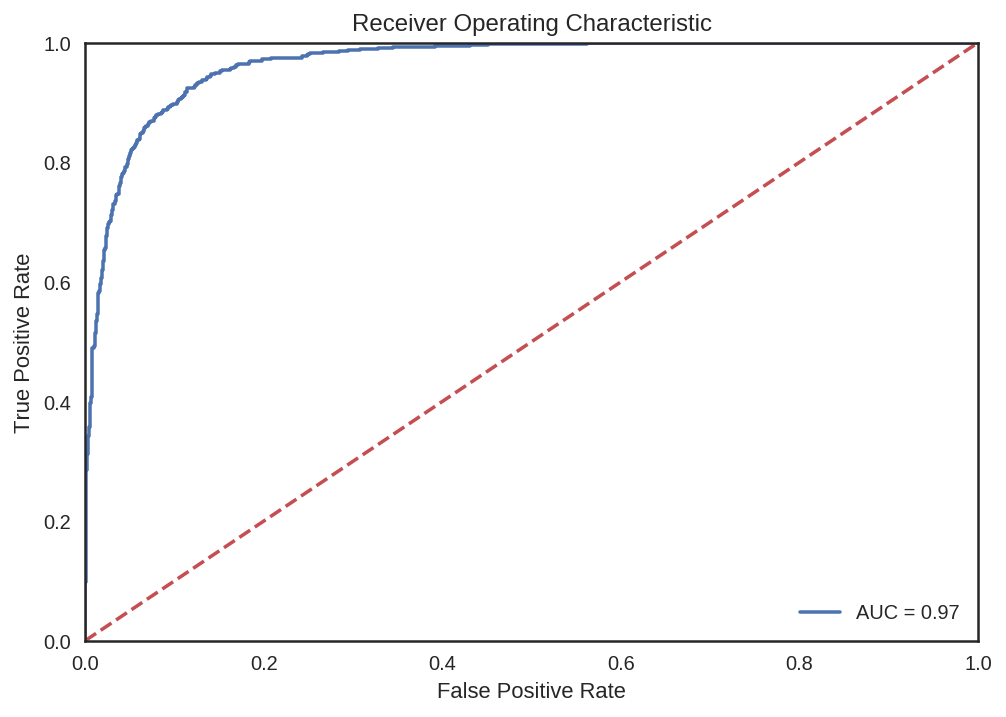

In [98]:
preds_7 = model_7.predict_proba(X_test)
fpr_7, tpr_7, _= roc_curve(y_test,preds_7)
roc_auc_7 = auc(fpr_7, tpr_7)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_7, tpr_7, 'b', label = 'AUC = %0.2f' % roc_auc_7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Plot Training and Testing Accuracy and Loss 

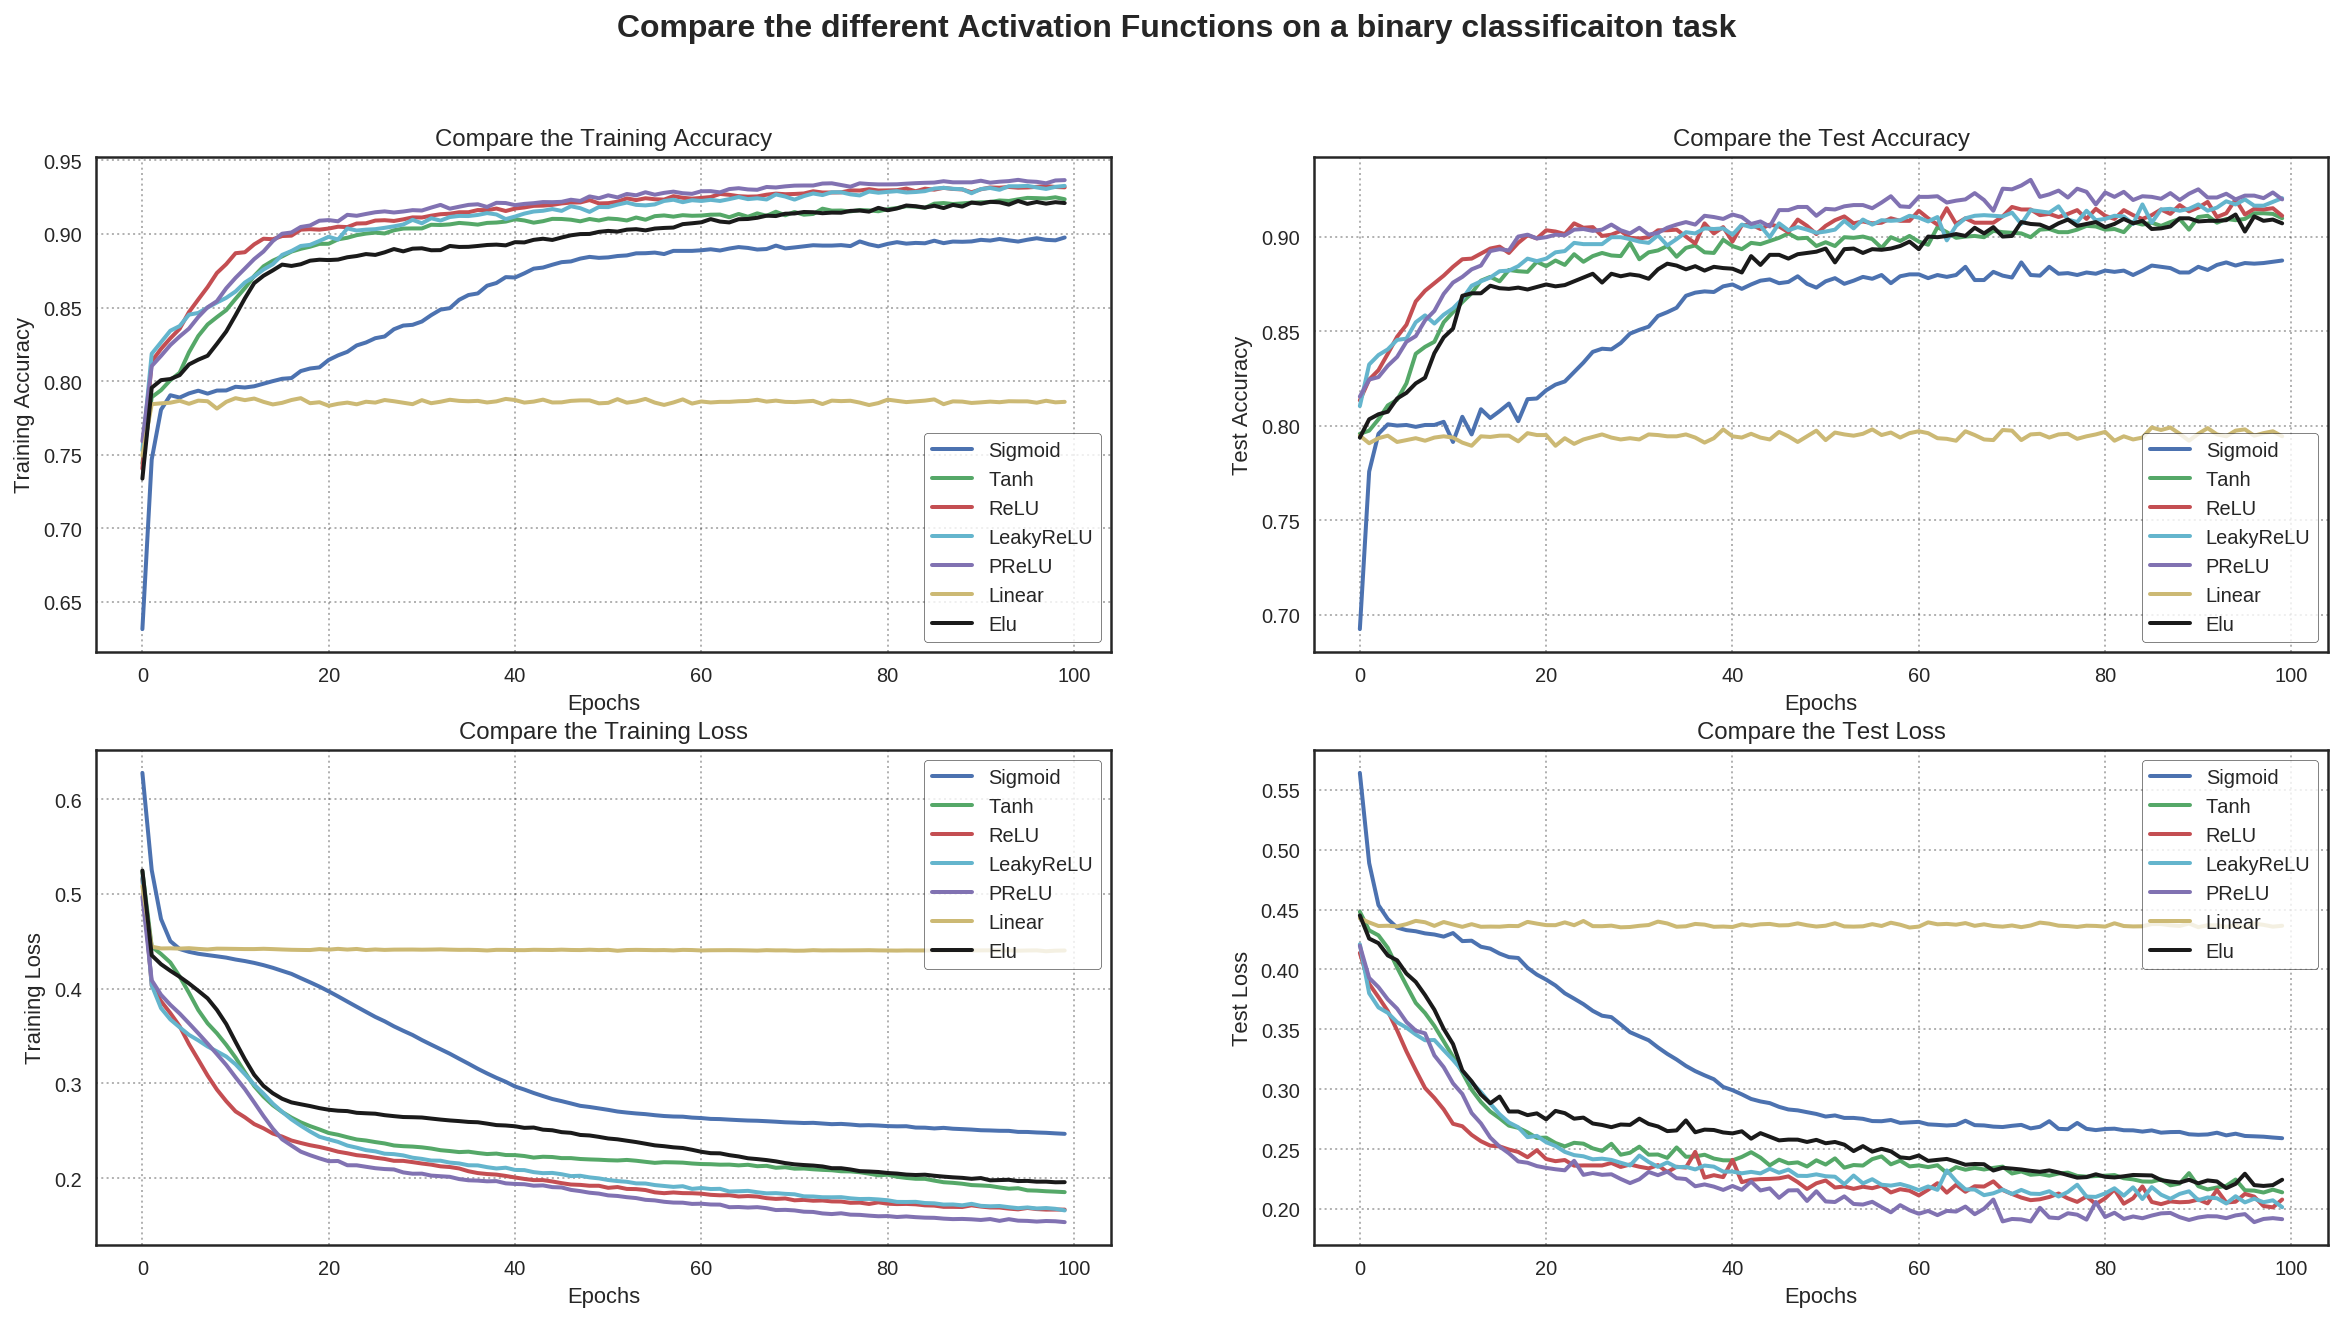

In [96]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
ax1.plot(model_1.history.history['acc'],color='b',linewidth=2,label='Sigmoid')
ax1.plot(model_2.history.history['acc'],color='g',linewidth=2,label='Tanh')
ax1.plot(model_3.history.history['acc'],color='r',linewidth=2,label='ReLU')
ax1.plot(model_4.history.history['acc'],color='c',linewidth=2,label='LeakyReLU')
ax1.plot(model_5.history.history['acc'],color='m',linewidth=2,label='PReLU')
ax1.plot(model_6.history.history['acc'],color='y',linewidth=2,label='Linear')
ax1.plot(model_7.history.history['acc'],color='k',linewidth=2,label='Elu')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy')


ax2.plot(model_1.history.history['val_acc'],color='b',linewidth=2,label='Sigmoid')
ax2.plot(model_2.history.history['val_acc'],color='g',linewidth=2,label='Tanh')
ax2.plot(model_3.history.history['val_acc'],color='r',linewidth=2,label='ReLU')
ax2.plot(model_4.history.history['val_acc'],color='c',linewidth=2,label='LeakyReLU')
ax2.plot(model_5.history.history['val_acc'],color='m',linewidth=2,label='PReLU')
ax2.plot(model_6.history.history['val_acc'],color='y',linewidth=2,label='Linear')
ax2.plot(model_7.history.history['val_acc'],color='k',linewidth=2,label='Elu')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy')


ax3.plot(model_1.history.history['loss'],color='b',linewidth=2,label='Sigmoid')
ax3.plot(model_2.history.history['loss'],color='g',linewidth=2,label='Tanh')
ax3.plot(model_3.history.history['loss'],color='r',linewidth=2,label='ReLU')
ax3.plot(model_4.history.history['loss'],color='c',linewidth=2,label='LeakyReLU')
ax3.plot(model_5.history.history['loss'],color='m',linewidth=2,label='PReLU')
ax3.plot(model_6.history.history['loss'],color='y',linewidth=2,label='Linear')
ax3.plot(model_7.history.history['loss'],color='k',linewidth=2,label='Elu')
ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss')

ax4.plot(model_1.history.history['val_loss'],color='b',linewidth=2,label='Sigmoid')
ax4.plot(model_2.history.history['val_loss'],color='g',linewidth=2,label='Tanh')
ax4.plot(model_3.history.history['val_loss'],color='r',linewidth=2,label='ReLU')
ax4.plot(model_4.history.history['val_loss'],color='c',linewidth=2,label='LeakyReLU')
ax4.plot(model_5.history.history['val_loss'],color='m',linewidth=2,label='PReLU')
ax4.plot(model_6.history.history['val_loss'],color='y',linewidth=2,label='Linear')
ax4.plot(model_7.history.history['val_loss'],color='k',linewidth=2,label='Elu')
ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss')

fig.suptitle('Compare the different Activation Functions on a binary classificaiton task',fontsize=16, fontweight='bold')
plt.show()

## Plot the ROC 

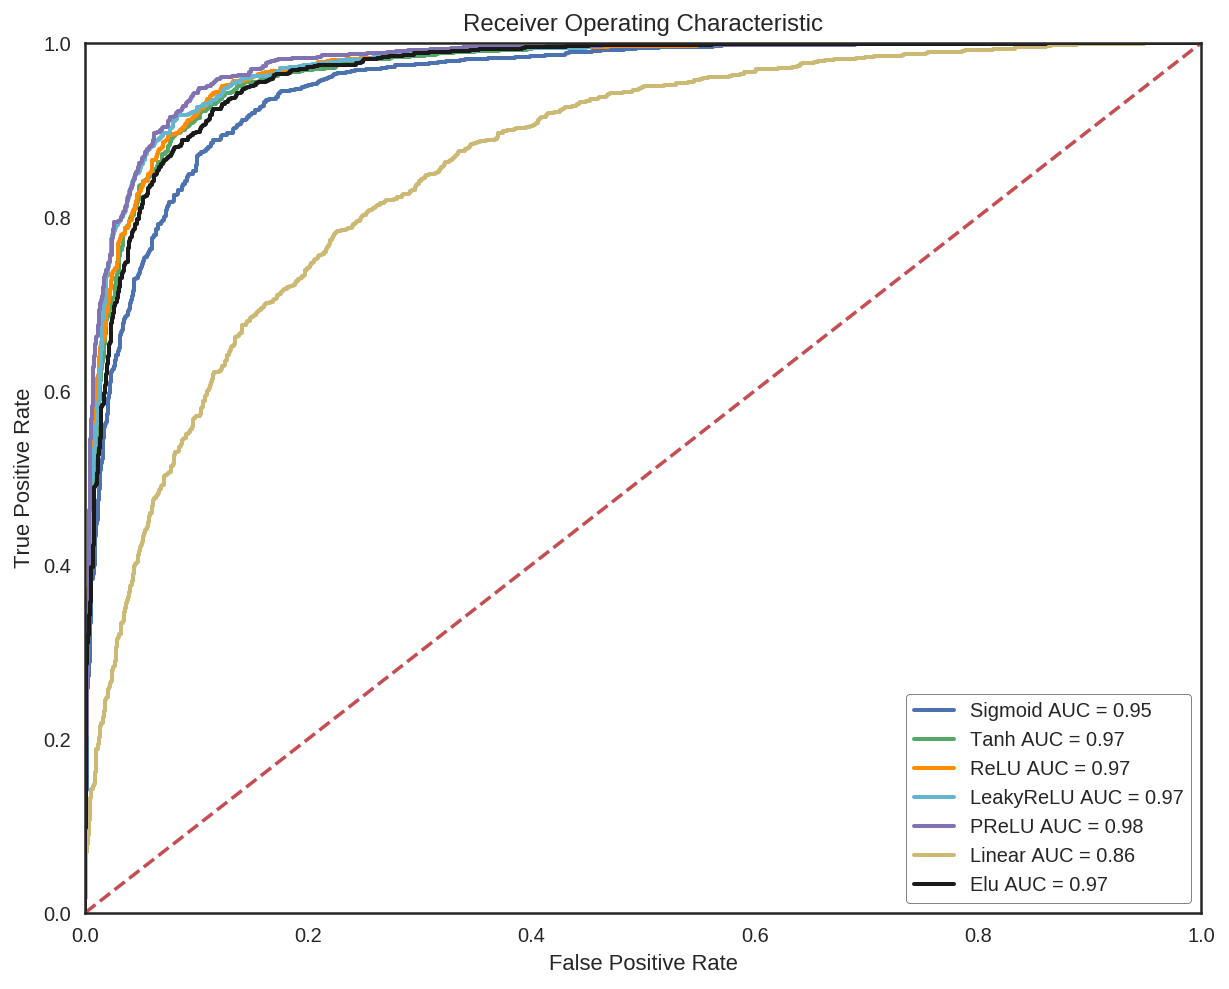

In [113]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_title('Receiver Operating Characteristic')
ax.plot(fpr_1, tpr_1, 'b',lw=2, label = 'Sigmoid AUC = %0.2f' % roc_auc_1)
ax.plot(fpr_2, tpr_2, 'g',lw=2, label = 'Tanh AUC = %0.2f' % roc_auc_2)
ax.plot(fpr_3, tpr_3, 'darkorange',lw=2, label = 'ReLU AUC = %0.2f' % roc_auc_3)
ax.plot(fpr_4, tpr_4, 'c',lw=2, label = 'LeakyReLU AUC = %0.2f' % roc_auc_4)
ax.plot(fpr_5, tpr_5, 'm',lw=2, label = 'PReLU AUC = %0.2f' % roc_auc_5)
ax.plot(fpr_6, tpr_6, 'y',lw=2, label = 'Linear AUC = %0.2f' % roc_auc_6)
ax.plot(fpr_7, tpr_7, 'k',lw=2, label = 'Elu AUC = %0.2f' % roc_auc_7)
ax.legend(loc = 'best',frameon=True,edgecolor='black')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
